In [1]:
'''얼굴 인식 SVM'''
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
{'svc__C': 5, 'svc__gamma': 0.005}


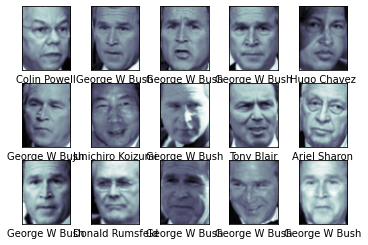

In [14]:
faces = fetch_lfw_people(min_faces_per_person=60)  # data
print(faces.target_names)
print(faces.images.shape)
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data, faces.target, random_state=0)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])


'''
class sklearn.decomposition.PCA

Principal component analysis.

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

n_components=150 :  Number of components to keep
 whiten=True : the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
'''
pca = RandomizedPCA(n_components=150, whiten=True, random_state=0)


'''
kernel='rbf' : use rbf kernel
class_weight='balanced' : The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
'''
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C':[1,5,10,50], 'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)
model = grid.best_estimator_
yfit = model.predict(Xtest)

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.81        16
     Colin Powell       0.87      0.85      0.86        61
  Donald Rumsfeld       0.75      0.69      0.72        35
    George W Bush       0.77      0.97      0.86       125
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       1.00      0.68      0.81        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.93      0.74      0.83        35

         accuracy                           0.83       337
        macro avg       0.90      0.76      0.81       337
     weighted avg       0.84      0.83      0.83       337



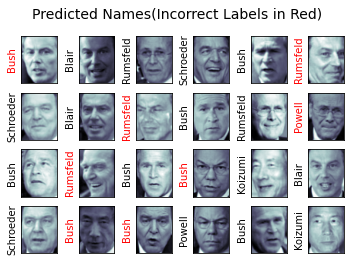

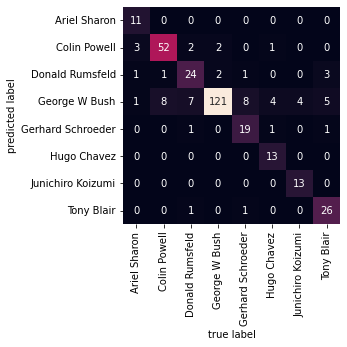

정확도:  0.827893175074184


In [13]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names(Incorrect Labels in Red)', size=14);
print(classification_report(ytest, yfit, target_names=faces.target_names))
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

from sklearn.metrics import accuracy_score
print('정확도: ', accuracy_score(ytest,yfit))